## Affine Grey Scale Transformation

$\displaystyle{\displaylines{g(x,y) = af(x,y) + b}}$


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
img = cv2.imread("../images/machine.pgm")

Max value: 182
Min value: 80


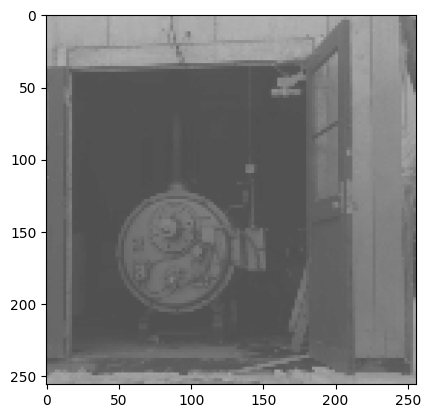

In [20]:
plt.imshow(img)
print("Max value:", np.max(img))
print("Min value:", np.min(img))

In [46]:
def affine(img, a,b):
    img_affine = a*img + b
    img_affine = np.where(img_affine > 256, 255, img_affine)
    img_affine = np.where(img_affine < 0, 0, img_affine)
    return img_affine.astype('int')

### Identity 
a = 1 and b = 0

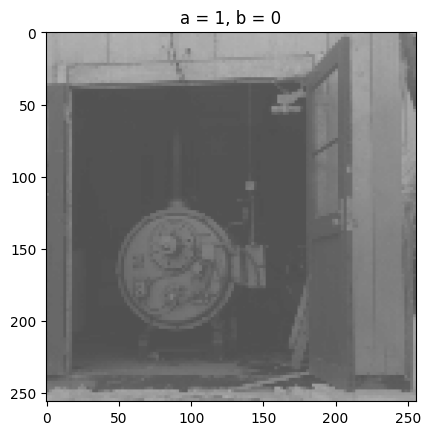

In [47]:
plt.imshow(affine(img, 1, 0))
plt.title('a = 1, b = 0');

### Contrast enhancement

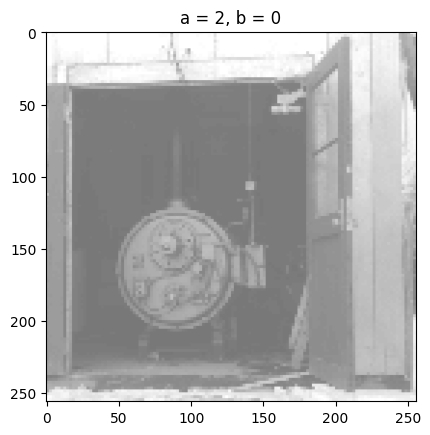

In [50]:
plt.imshow(affine(img, 1.5, 0))
plt.title('a = 2, b = 0');

### contrast attenuation: 0<a<1

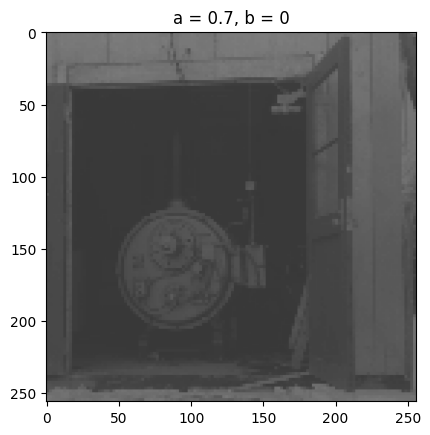

In [51]:
plt.imshow(affine(img, 0.7, 0))
plt.title('a = 0.7, b = 0');

### Brightening
$\displaystyle{\displaylines{a = 1}}$ $\displaystyle{\displaylines{b > 0}}$

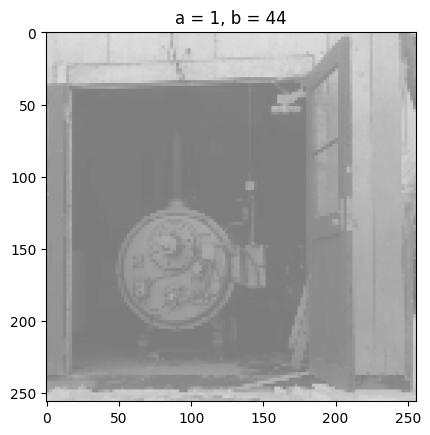

In [53]:
plt.imshow(affine(img, 1, 44))
plt.title('a = 1, b = 44');

### Darkening
$\displaystyle{\displaylines{a = 1}}$ $\displaystyle{\displaylines{b < 0}}$

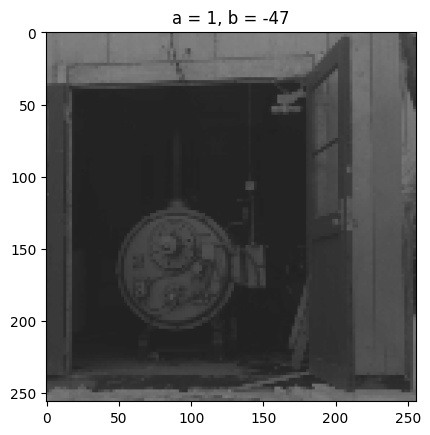

In [55]:
plt.imshow(affine(img, 1, -47))
plt.title('a = 1, b = -47');

### Greyscale reversion
$\displaystyle{\displaylines{a = -1}}$ $\displaystyle{\displaylines{b= max(img)}}$

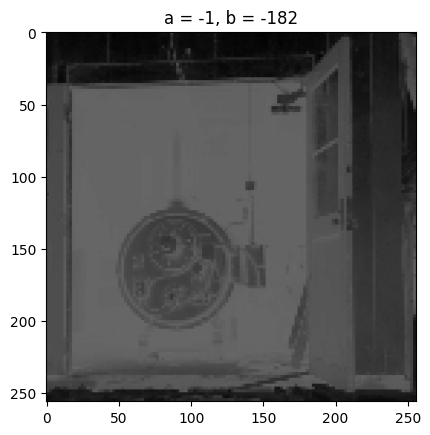

In [57]:
plt.imshow(affine(img, -1, np.max(img)))
plt.title(f'a = -1, b = -{np.max(img)}');

### Greyscale transformation to range [0,255]

Disadvantages
 - single outlier can spoil result17 18
 - take into account how often a grey value is present

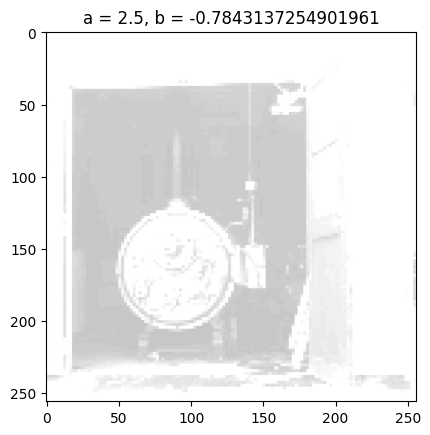

In [63]:
plt.imshow(affine(img, 255/(np.max(img)-np.min(img)), -1*np.min(img)/(np.max(img)-np.min(img))))
plt.title(f'a = {255/(np.max(img)-np.min(img))}, b = {-1*np.min(img)/(np.max(img)-np.min(img))}');

### Thresholding

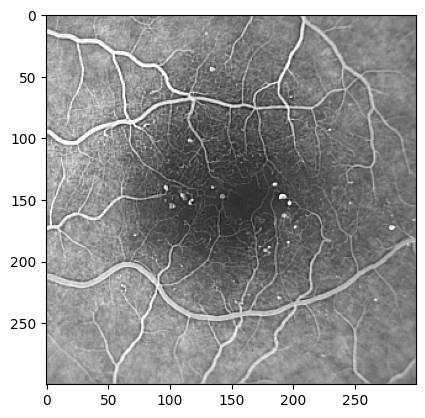

In [78]:
img = cv2.imread("../images/binary_angiogram.png")
plt.imshow(img); 

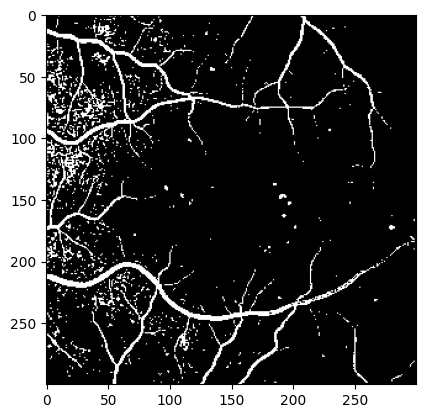

In [88]:
plt.imshow((img[:,:,0] > 180).astype('int'), cmap = 'gray')

### Logarithmic Dynamic Compression

In [98]:
x=np.arange(0, 30, 0.1)
y= np.log(1+x)

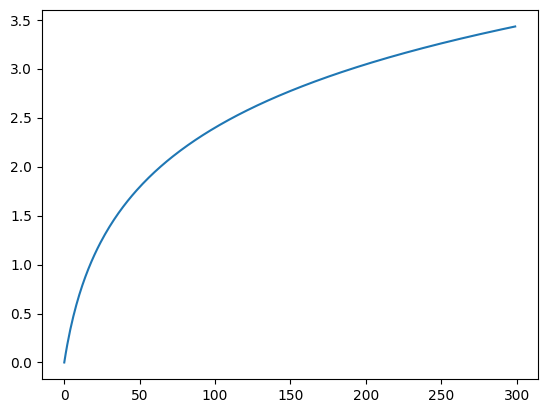

In [99]:
plt.plot(y)

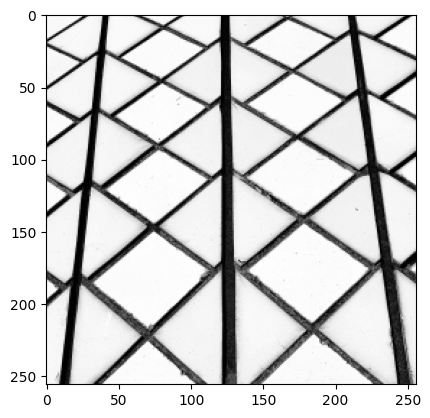

In [132]:
img = cv2.imread("../images/Sydney_Opera_House_Tiles_Close_Up.jpg", 0)
resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

plt.imshow(resized, cmap = 'gray'); 

In [154]:
fft_img = np.fft.fft2(resized)
fft_img = np.fft.fftshift(fft_img)

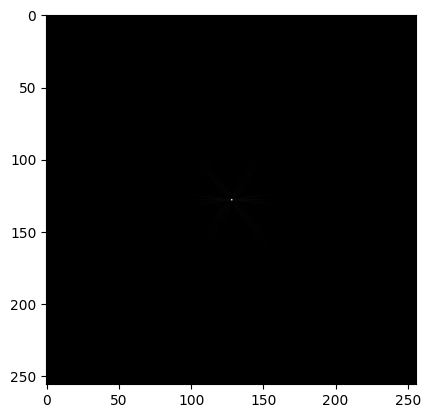

In [158]:
plt.imshow(np.abs(fft_img), cmap = 'gray')

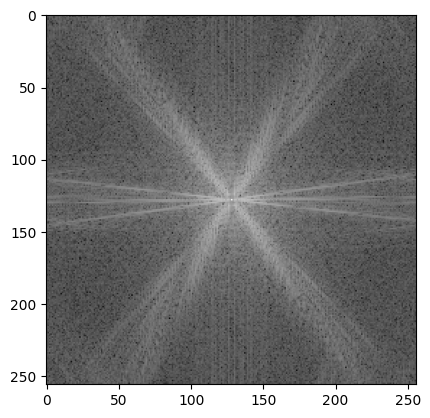

In [159]:
plt.imshow((255/np.log(1+np.max(np.abs(fft_img))))*np.log(1+np.abs(fft_img)), cmap = 'gray')